<a href="https://colab.research.google.com/github/guebin/PP2024/blob/main/posts/14wk-2.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 1. 강의영상 

{{<video https://youtu.be/playlist?list=PLQqh36zP38-yhYjyDRkhCJb6R3GNIL-Ex&si=VMJzZ7DkVAhpY2pa >}}

# 2. Imports 

In [3]:
import time
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# 3. 코딩 문해력

## A. 수용력과 이해력 

`-` 수용력 테스트1: 2주차-2

$f(x)=x^2$위의 임의의 점을 입력하면 접선을 리턴하는 함수를 구현하라. 

In [4]:
def make_func(x0):
    f = lambda x: x**2
    def func(x):
        h = 0.0001
        a = (f(x0+h)-f(x0))/h 
        return a*(x-x0) + f(x0)
    return func

이거.... 얼마전에 배운내용이었음.. 

`-` 수용력 테스트2: map + list 

In [5]:
f = lambda x: max(x)
x1 = [1,1,2]
x2 = [2,3,6,8]
x3 = [4,5,10,15]
list(map(f,[x1,x2,x3]))

[2, 8, 15]

`-` 이해력 테스트1: `map()`으로 생성된 인스턴스는 iterable

In [6]:
for i in map(f,[x1,x2,x3]):
    print(i)

2
8
15


`-` 이해력 테스트2: `str`은 callable

`-` 이해력 테스트3: `+.join(??)` 자리에 올 수 있는건?

## B. 흡수력과 활용력 

In [7]:
att = np.random.choice(np.arange(10,21)*5,20); rep = np.random.choice(np.arange(5,21)*5,20); mid = np.random.choice(np.arange(0,21)*5,20); fin = np.random.choice(np.arange(0,21)*5,20)
df = pd.DataFrame({'att':att,'rep':rep,'mid':mid,'fin':fin})[:5]
df

,att,rep,mid,fin
0,80,80,100,95
1,80,35,100,75
2,70,50,35,35
3,100,60,15,95
4,80,25,60,0


`-` 흡수력 테스트: 이거 보고 바로 구조가 이해되면 흡수력이 좋은것임 

In [367]:
df.apply({'att': lambda x: x+1})

,att
0,86
1,96
2,81
3,66
4,86


`-` 활용력 테스트: 위의코드를 보고 이 코드까지 떠올릴 수 있으면 문일지십의 단계

> 수용력 $\to$ 이해력 $\to$ 흡수력 $\to$ 활용력 

# 4. 함수

## A. 대표예시 

`# 예제1` -- 은근히 짜증났던 `plt.plot()`

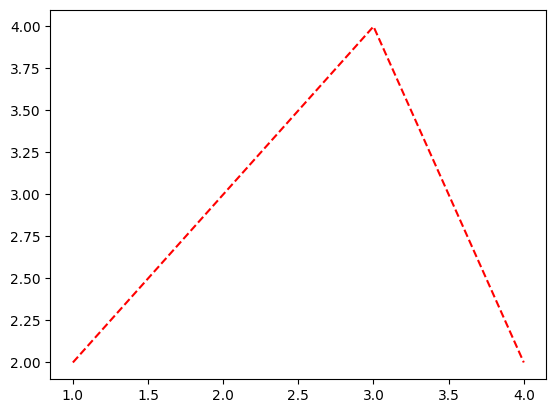

In [10]:
plt.plot([1,2,3,4],[2,3,4,2],'r--')

In [11]:
plt.plot([1,2,3,4],[2,3,4,2],color='lime','--')

SyntaxError: positional argument follows keyword argument (2277522587.py, line 1)

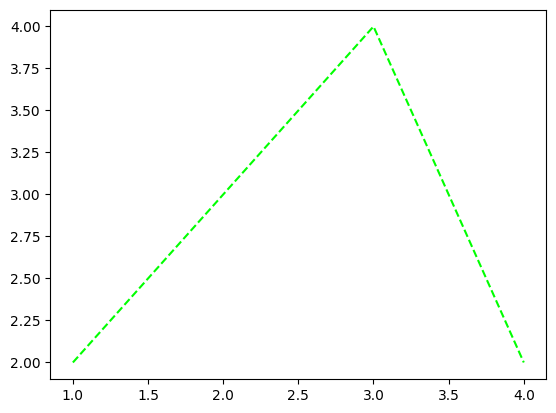

In [12]:
plt.plot([1,2,3,4],[2,3,4,2],'--',color='lime')

`#`

## B. 개념 

`# 예시1` --  함수사용시, 함수의 입력값을 전달하는 두가지 방식, 원칙1

`-` 함수 사용시, 함수의 입력값을 전달하는 두가지 방식은 아래와 같다. 

In [29]:
def func(x,y):
    return x**y 

In [32]:
func(2,3) # 이렇게 입력하는 경우

8

In [33]:
func(x=2,y=3) # 이렇게 입력하는 경우

8

`-` 여기에서 `func(2,3)`와 같이 사용할때, 함수의 입력값을 위치인자로 전달했다고 한다. 이는 컴퓨터가 입력값 2,3이 있는 위치에 따라서 x,y를 할당한다는 의미이다. 즉 앞에있는걸 x로 뒤에있는걸 y로 받는다는 의미이다. 따라서 `func(2,3)`와 `func(3,2)`는 다르게 동작한다. 

In [36]:
func(2,3), func(3,2)

(8, 9)

`-` `func(x=2,y=3)`와 같이 사용하면, 함수의 입력값을 키워드인자로 전달했다고 한다. 이는 컴퓨터가 입력값의 위치에 따라 x,y를 할당하는게 아닌 키워드값 자체를 보고 할당한다는 것이다. 따라서 `func(x=2,y=3)` 와 `func(y=3,x=2)`는 같은 동작을 한다. 

In [39]:
func(x=2,y=3), func(y=3,x=2)

(8, 8)

`-` 위치인자와 키워드인자를 이해할때 위치인자는 입력을 튜플로 키워드인자는 입력을 딕셔러니로 생각하면 편리하다. 

In [50]:
tpl = (2,3)
func(*tpl)

8

In [52]:
tpl = (3,2)
func(*tpl)

9

In [55]:
dct = dict(x=2,y=3) 
func(**dct)

8

In [58]:
dct = dict(y=3,x=2) 
func(**dct)

8

> 원칙1: 위치인자의 입력은 튜플로, 키워드인자의 입력은 딕셔너리로 생각한다. 

`#`

`# 예시2` --  함수를 정의할때, 입력값을 정의하는 두가지 방식, 원칙2,3

`-` 함수를 정의할때, 함수의 입력값을 아래와 같이 기본값을 주어 정의할 수 있다. 

In [60]:
def jump(x,y=1):
    return x+y

In [61]:
jump(1)

2

> 원칙2: 미리정의된 입력값은 생략가능하다 --> 미리 정의된 키워드인자는 생략가능하다.

In [100]:
jump(1,5)

6

`-` 이때 x는 위치인자로 정의되었다고 하고, y는 키워드 인자로 정의되었다고 표현한다. 그래서 엄밀하게 개념상으로는 아래와 같다. 

```Python
def func(x,y): # x,y는 모두 위치인자로 정의되었음. 
    return x**y 
```

```Python
def jump(x,y=1): # x는 위치인자로, y는 키워드 인자로 정의되었음. 
    return x+y
```

`-` 이러한 설명은 와닿지 않는데, 위치인자로 정의되었다고 해도 그걸 키워드인자로 모두 쓸 수 있고 키워드인자로 정의되었다고 해도 그걸 위치인자로 쓸 수 있기 때문이다. 

In [101]:
func(2,3) # 위치인자로 정의된걸 위치인자로 사용

8

In [102]:
func(x=2,y=3) # 위치인자로 정의된걸 키워드인자로 사용

8

In [103]:
jump(1,y=2) # 위치인자로 정의된건 위치인자로, 키워드인자로 정의된건 키워드인자로 사용

3

In [104]:
jump(1,2) # 정의된것 무시하고 둘다 위치인자로사용

3

In [105]:
jump(x=1,y=2) # 정의된것 무시하고 둘다 키워드인자로 사용

3

> 원칙3: 위치인자로 정의되었을지라도 키워드인자로 쓸 수 있고, 키워드 인자로 정의되었을지라도 위치인자로 쓸 수 있다. 

`#`

`# 예제3` -- 원칙4: 함수의 입력값을 전달할때, 위치인자는 키워드인자 뒤에 올 수 없다. 

In [106]:
func(1,2) # 가능

1

In [107]:
func(1,y=2) # 가능

1

In [87]:
func(x=1,2) # 불가능

SyntaxError: positional argument follows keyword argument (3028310640.py, line 1)

In [84]:
func(y=2,1) # 불가능

SyntaxError: positional argument follows keyword argument (872138673.py, line 1)

In [89]:
jump(1,y=2) # 가능

3

In [90]:
jump(x=1,y=2) # 가능

3

In [91]:
jump(1,2) # 가능

3

In [93]:
jump(x=1,2) # 불가능

SyntaxError: positional argument follows keyword argument (2833435458.py, line 1)

> 원칙4: 함수에 입력값을 전달할때, 위치인자는 키워드인자 뒤에 올 수 없다. ($\star\star\star$)

`#`

`# 예제4` -- 길이가 변하는 위치인자 `*args`, 원칙5,6,7

In [112]:
def dummy(x,y,*args):
    return x,y,args

In [113]:
dummy(1,2,3,4,5,6)

(1, 2, (3, 4, 5, 6))

> 원칙5: 가변위치인자를 입력을 받을때는 위치인자 뒤에, `*args`를 사용하면 된다. 이때 함수내에서 `*args`를 다룰때는 `*`를 제외하고 튜플로 취급하면된다. 

In [127]:
dummy(1) 

TypeError: dummy() missing 1 required positional argument: 'y'

In [128]:
dummy(1,2)

(1, 2, ())

> 원칙6: 위치인자는 생략불가능 하지만, 가변위치인자는(`*args`)는 생략가능하다. 

`-` 아래는 위치인자, 가변위치인자, 키워드인자를 사용한 예시이다. 

In [129]:
def mysum(x,y,*args,verbose=False):
    if verbose:
        text = "+".join(map(str,args))
        print(f"{x}+{y}+{text}={x+y+sum(args)}")
    return x+y+sum(args)

In [130]:
mysum(1,2,3,4,5)

15

In [131]:
mysum(1,2,3,4,5,verbose=True)

1+2+3+4+5=15


15

`-` 이제 아래의 코드를 관찰해보자. 

In [132]:
mysum(1,2,3,4,5,True)

16

컴퓨터 입장에서는 마지막의 True를 `verbose`에 해당하는 입력값이라 이해 못할 것이다. 따라서 이 상황에서 `verbose`를 사용하려면 키워드인자로 밖에 쓸 수 없다. 

> 원칙7: 함수를 정의할 때 `*args` 와 키워드인자가 동시에 정의되었다면, 함수를 사용할 때 키워드인자를 쓰려면 반드시 키워드인자로만 써야한다!

`#`

`# 예제5` -- 길이가 변하는 키워드인자, `**kwargs`

In [153]:
def dummy(**kwargs):
    return kwargs

> 원칙8: 가변키워드인자를 입력으로 받는 함수를 정의할때는 `**kwargs`를 사용하면 된다. 함수내에서 `*kwargs`를 다룰때는 `**`를 제외하고 딕셔너리로 취급하면된다. 

In [155]:
dummy(x=1,y=2,z=3)

{'x': 1, 'y': 2, 'z': 3}

`#`

`# 예제6` -- 피자주문 ($\star\star$)

--예비학습--

In [209]:
toppings = () 
bool(toppings)

False

In [210]:
toppings = (1,2,3)
bool(toppings)

True

In [211]:
extra_order = {}
bool(extra_order)

False

In [212]:
extra_order = {'a':[1,2,3],'b':[2,3,4]}
bool(extra_order)

True

--예비학습끝--

In [156]:
def order_pizza(pizza, *toppings, size="medium", **extra_orders):
    print(f"[{pizza}피자 {size}사이즈]")
    
    if toppings:
        print("toppings:")
        for topping in toppings:
            print(f"  - {topping}")
    
    if extra_orders:
        print("extra_orders:")
        for option, value in extra_orders.items():
            print(f"  - {option}: {value}")

In [157]:
order_pizza("페퍼로니")

[페퍼로니피자 medium사이즈]


In [158]:
order_pizza("페퍼로니",size="large")

[페퍼로니피자 large사이즈]


In [159]:
order_pizza("페퍼로니","베이컨","할라피뇨")

[페퍼로니피자 medium사이즈]
toppings:
  - 베이컨
  - 할라피뇨


In [160]:
order_pizza("페퍼로니","베이컨","할라피뇨",size="large")

[페퍼로니피자 large사이즈]
toppings:
  - 베이컨
  - 할라피뇨


In [161]:
order_pizza("페퍼로니","베이컨","할라피뇨",size="large",스파게티=1,스프라이트=2)

[페퍼로니피자 large사이즈]
toppings:
  - 베이컨
  - 할라피뇨
extra_orders:
  - 스파게티: 1
  - 스프라이트: 2


`#`

`# 예제7` -- `/`

In [164]:
def dummy(x,y,/,z):
    return x,y,z

In [165]:
dummy(1,2,3)

(1, 2, 3)

In [167]:
dummy(x=1,y=2,z=3) 

TypeError: dummy() got some positional-only arguments passed as keyword arguments: 'x, y'

> 원칙9: `/` 의 앞의 변수는 전용위치인자가 된다. 즉 사용시 위치인자로만 사용가능하다. 

`#`

`# 예제8` -- `*`

In [176]:
def dummy(a,b,/,c,d,*,f=1,g=1):
    return a,b,c,d,f,g

In [186]:
dummy(a=1,b=1,c=1,d=1,f=1,g=1) # a,b는 위치인자만 가능 

TypeError: dummy() got some positional-only arguments passed as keyword arguments: 'a, b'

In [190]:
dummy(1,2,3,4,-1,-1) # f,g 는 키워드인자만 가능

TypeError: dummy() takes 4 positional arguments but 6 were given

In [194]:
dummy(1,2,3,4,f=-1,g=-1),dummy(1,2,c=3,d=4,f=-1,g=-1) 
# c,d는 위치인자 키워드인자 둘다가능 (정의는 위치로 되어있음)

((1, 2, 3, 4, -1, -1), (1, 2, 3, 4, -1, -1))

> 원칙9: `*` 의 뒤의 변수는 전용키워드인자가 된다. 즉 사용시 키워드인자로만 사용가능하다. 

In [179]:
def dummy(a,b,/,c,d,*,f,g):
    return a,b,c,d,f,g

> 원칙10: `*` 를 사용하면 기본값이 없는 키워드인자를 정의할 수 있다. 

In [181]:
dummy(1,2,3,4,-1,-1)

TypeError: dummy() takes 4 positional arguments but 6 were given

In [182]:
dummy(1,2,3,4,f=-1,g=-1)

(1, 2, 3, 4, -1, -1)

`#`

`요약` -- 저의 머리..

1. 함수의 도움말을 보고 키워드인자와 위치인자를 파악한다.
2. 위치인자로 정의된건 위치인자로 쓰고 키워드인자로 정의된건 키워드인자로 쓴다. (다른생각 하지말자)
3. **원칙4: 위치인자는 무조건 키워드인자 앞에 쓴다.** 를 기억하자. 

`#`

# 5. 타입힌트

## A. 왜 배워야함?

`-` 이거 자체만 읽을줄 알아도 함수를 눈치껏 쓸 수 있다. 

```Python
plt.hist(
    x: 'ArrayLike | Sequence[ArrayLike]',
    bins: 'int | Sequence[float] | str | None' = None,
    range: 'tuple[float, float] | None' = None,
    density: 'bool' = False,
    weights: 'ArrayLike | None' = None,
    cumulative: 'bool | float' = False,
    bottom: 'ArrayLike | float | None' = None,
    histtype: "Literal['bar', 'barstacked', 'step', 'stepfilled']" = 'bar',
    align: "Literal['left', 'mid', 'right']" = 'mid',
    orientation: "Literal['vertical', 'horizontal']" = 'vertical',
    rwidth: 'float | None' = None,
    log: 'bool' = False,
    color: 'ColorType | Sequence[ColorType] | None' = None,
    label: 'str | Sequence[str] | None' = None,
    stacked: 'bool' = False,
    *,
    data=None,
    **kwargs,
) -> 'tuple[np.ndarray | list[np.ndarray], np.ndarray, BarContainer | Polygon | list[BarContainer | Polygon]]'
```

(array([17., 35., 28., 20.]),
 array([-3., -1.,  0.,  1.,  3.]),
 <BarContainer object of 4 artists>)

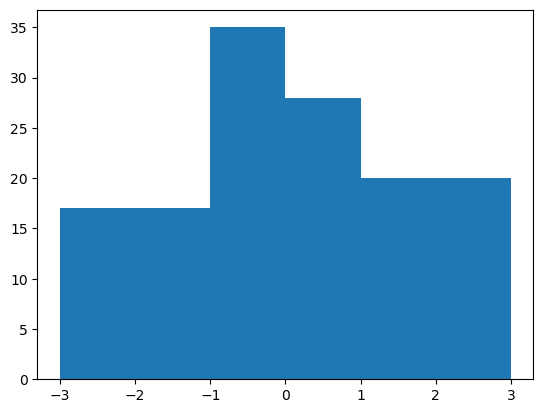

In [18]:
plt.hist(
    x = np.random.randn(100),
    bins = (-3,-1,0,1,3), # 네모가 잘리는 위치
)

## B. 사용히는 방법 

In [5]:
def greet(name: str) -> str:
    return f"Hello, {name}!"

In [5]:
def add(a: int, b: int) -> int:
    return a + b

## C. 읽는 방법 

In [4]:
from typing import List, Tuple, Dict, Optional, Union, Any, Callable

`# 예시1`  

In [264]:
def process_items(items: typing.List[str]) -> int:
    return len(items)

# 입력예시: ["apple", "banana", "cherry"]
# 출력예시: 3 

In [234]:
process_items(['apple', 'banana', 'cherry'])

3

`#`

`# 예시2`

In [265]:
def get_coordinates() -> Tuple[float, float]:
    return (45.0, 90.0)

# 입력 형식 예시: None
# 출력 형식 예시: (45.0, 90.0)

In [236]:
get_coordinates()

(45.0, 90.0)

`#`

`# 예시3`

In [266]:
def count_words(text: str) -> Dict[str, int]:
    words = text.split()
    return {word: words.count(word) for word in words}

# 입력 형식 예시: "apple banana apple cherry banana apple"
# 출력 형식 예시: {'apple': 3, 'banana': 2, 'cherry': 1}

In [267]:
text = "apple banana apple cherry banana apple"
count_words(text)

{'apple': 3, 'banana': 2, 'cherry': 1}

`#`

`# 예시4`

In [276]:
def find_item(items: List[str], search: str) -> Optional[int]:
    try:
        return items.index(search)
    except ValueError:
        return None

# 설명: 문자열 리스트에서 특정 문자열의 인덱스를 찾고, 찾지 못하면 `None`을 반환
# 입력 형식 예시: 
# - item: ['apple', 'banana', 'cherry']
# - search: 'banana'
# 출력 형식 예시: 1 또는 None

In [277]:
find_item(['apple', 'banana', 'cherry'], 'banana')

1

In [278]:
find_item(['apple', 'banana', 'cherry'], 'orange')

In [279]:
print(find_item(['apple', 'banana', 'cherry'], 'orange'))

None


`#`

`# 예시5`

In [284]:
def process_value(value: Union[int, str]) -> str:
    if isinstance(value, int):
        return f"Number: {value}"
    else:
        return f"String: {value}"
    
# 입력 형식 예시: 
# - value: 10  <-- 이것도 가능하고 
# - value: "hello"  <-- 이것도 가능하다
# 출력 형식 예시: "Number: 10" 또는 "String: hello" (문자열) 

In [282]:
process_value(10)

'Number: 10'

In [283]:
process_value("hello")

'String: hello'

`#`

`# 예시6`

In [285]:
def print_value(value: Any) -> None:
    print(value)
    
# 입력 형식 예시
# - value: 아무거나
# 출력 형식 예시
# - None 

In [246]:
print_value(123)

123


In [247]:
print_value('hello')

hello


`#`

`# 예시7`

In [288]:
def apply_function(x: int, func: Callable[[int], float]) -> int:
    return func(x)

# 입력형식예시
# - x: 1 
# - func: np.sqrt,  <-- 이런건 가능. int를 입력으로 받아서, float형을 리턴하는 callable object
# - func: lambda x: x**2,  <-- 이런건 권장X. int를 입력으로 받아서, int형을 리턴하니까..
# 출력형식예시
# - 1.7320508075688772

In [289]:
apply_function(3,np.sqrt)

1.7320508075688772

`#`

# 6. 데코레이터

## A. 개념 

`-` 데코레이터 쓰는법 

1. 함수입력,함수출력을 수행하는 함수를 만든다. 
2. 입력함수 위에 데코를 쓴다. 그러면 그 입력함수는 출력함수로 바뀐다. 

`-` 데코레이터 코드 템플릿1 -- 이걸 외우진 마세요 

**데코레이터 선언**

```Python
def decorator_name(func):
    ...
    return wrapper
```

```Python
def 꾸밈함수이름(입력함수):
    ... 
    return 출력함수
```

**데코레이터 사용**

```Python
@decorator_name
def myfunc():
    pass
```

```Python
@꾸밈함수이름
def 꾸밈당하는함수():
    pass 
```

`# 예제1` -- 코드 템플릿1: 사용예시

In [337]:
# 데코레이터 선언
def 무조건메롱을리턴(func):
    wrapper = lambda x: "메롱"
    return wrapper

In [338]:
def f(x):
    return x**2
list(map(f,[1,2,3,4,5]))

[1, 4, 9, 16, 25]

In [341]:
@무조건메롱을리턴
def f(x):
    return x**2
list(map(f,[1,2,3,4,5]))

['메롱', '메롱', '메롱', '메롱', '메롱']

`#`

`# 예제2` -- 데코레이터와 같은코드

`-` 코드1

In [352]:
def 무조건메롱을리턴(func):
    wrapper = lambda x: "메롱"
    return wrapper

def f(x):
    return x**2

f = 무조건메롱을리턴(f)

[f(x) for x in range(5)]

['메롱', '메롱', '메롱', '메롱', '메롱']

`-` 코드2

In [351]:
def 무조건메롱을리턴(func):
    wrapper = lambda x: "메롱"
    return wrapper

@무조건메롱을리턴
def f(x):
    return x**2

[f(x) for x in range(5)]

['메롱', '메롱', '메롱', '메롱', '메롱']

`-` 좀 더 확장하면.. 

```Python
@dec2
@dec1
def func(arg1, arg2, ...):
    pass
```

```Python
def func(arg1, arg2, ...);
    pass 
func = dec2(dec1(func))
```

`-` 데코레이터 코드 템플릿2 -- 아래의 형태를 기억할것 

```Python
def decorator_name(func):
    def wrapper(*args, **kwargs):
        args = list(args)
        kwargs = dict(kwargs)
        func_result = func(*args, **kwargs)
        return func_result
    return wrapper
```

```Python
def 꾸밈함수이름(입력함수):
    def 출력함수(*args, **kwargs):
        args = list(args)
        kwargs = dict(kwargs)
        입력함수의출력 = 입력함수(*args, **kwargs)
        return 입력함수의출력
    return 출력함수
```

## B. 대표예시

`# 예제1` -- 출력결과는 항상 리스트로

In [417]:
def 출력은리스트로(func):
    def wrapper(*args,**kwargs):
        func_result = func(*args,**kwargs)
        return list(func_result)
    return wrapper

In [423]:
def 입력은넘파이로(func):
    def wrapper(*args,**kwargs):
        args = [np.array(l) for l in args]
        kwargs = {k:np.array(v) for k,v in kwargs.items()}
        func_result = func(*args,**kwargs)
        return func_result
    return wrapper

In [424]:
@출력은리스트로
@입력은넘파이로
def add(a,b):
    return a+b    

In [425]:
add([1,2,3],[2,3,4])

[3, 5, 7]

`#`

`# 예시2` -- 실행시간측정 

In [426]:
def 시간측정(func):
    def wrapper(*args,**kwargs):
        t1 = time.time()
        func_result = func(*args,**kwargs)
        t2 = time.time()
        print(f"실행시간: {t2-t1}")
        return func_result 
    return wrapper

In [427]:
@시간측정
@출력은리스트로
@입력은넘파이로
def sub(a,b):
    return a-b 

In [428]:
sub([1,2,3],[1,2,3])

실행시간: 2.6464462280273438e-05


[0, 0, 0]

`#` 

`# 예시3` -- 출력결과 시각화 

In [443]:
def 출력시각화(func):
    def wrapper(*args,**kwargs):
        func_result = func(*args,**kwargs)
        plt.plot(func_result,'--o')
        return func_result 
    return wrapper

In [444]:
@출력시각화
@입력은넘파이로
def mul(a,b):
    return a*b 

array([ 2, -3,  4])

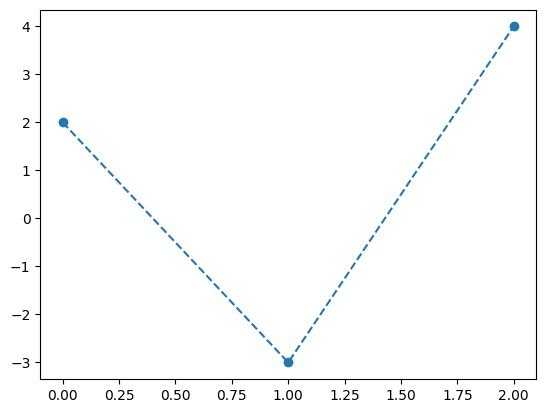

In [445]:
mul([1,-1,1],[2,3,4])

## C. 내장 데코레이터 

`-` 아래는 모두 내장데코레이터였음.. 

```Python
@staticmethod
@classmethod
@staticmethod
```

# 7. 제너레이터

## A. 대표예제  

`# 예시1` -- `for`/`if` 마스터..

In [622]:
att = np.random.choice(np.arange(10,21)*5,20); rep = np.random.choice(np.arange(5,21)*5,20); mid = np.random.choice(np.arange(0,21)*5,20); fin = np.random.choice(np.arange(0,21)*5,20)
df = pd.DataFrame({'att':att,'rep':rep,'mid':mid,'fin':fin})
df

,att,rep,mid,fin
0,80,55,65,95
1,100,80,15,25
2,90,55,5,95
3,100,95,55,85
4,50,35,90,100
5,100,75,80,10
6,80,100,50,15
7,80,80,25,40
8,55,90,90,50
9,70,90,100,70


In [356]:
grades = [] 
for i in range(len(df)):
    row = df.iloc[i]
    att,rep,mid,fin = row 
    total = att*0.1 + rep*0.2 + mid *0.3 + fin*0.4
    if total >= 70: 
        grade =  "A+"
    elif 40 < total: 
        grade = "B0"
    else: 
        grade = "F"
    grades.append(grade)

In [357]:
grades

['B0',
 'A+',
 'B0',
 'F',
 'B0',
 'B0',
 'B0',
 'B0',
 'B0',
 'A+',
 'A+',
 'A+',
 'B0',
 'B0',
 'B0',
 'A+',
 'B0',
 'B0',
 'B0',
 'B0']

`#`

`# 예시2` -- 사실 머리속에는 파이프라인의 개념이 있지 않나? 

In [369]:
row = df.iloc[0]
row

att    50
rep    85
mid    60
fin     5
Name: 0, dtype: int64

In [370]:
def calculate_total(row):
    att, rep, mid, fin = row 
    total = att*0.1 + rep*0.2 + mid*0.3 + fin*0.4 
    return total

In [371]:
total = calculate_total(row)
total

42.0

In [372]:
def make_grade(total):
    if total >= 70: 
        return "A+"
    elif 40 < total: 
        return "B0"
    else: 
        return "F"    

In [373]:
make_grade(total)

'B0'

In [375]:
# 깔끔 그자체
row = df.iloc[0]
total = calculate_total(row)
grade = make_grade(total) 

In [377]:
# 그렇지만 for문과 결합하면 더러워짐 
n = len(df)
grades = []
for i in range(n):
    row = df.iloc[i]
    total = calculate_total(row)
    grade = make_grade(total)
    grades.append(grade) 
grades

['B0',
 'A+',
 'B0',
 'F',
 'B0',
 'B0',
 'B0',
 'B0',
 'B0',
 'A+',
 'A+',
 'A+',
 'B0',
 'B0',
 'B0',
 'A+',
 'B0',
 'B0',
 'B0',
 'B0']

`# 예시3` -- 제너레이터의 개발 

`-` row-wise 하게 쪼갠다. 

In [635]:
def each_row(df):
    n = len(df) 
    for i in range(n):
        yield df.iloc[i]

In [636]:
rows = each_row(df) 

`-` total을 계산한다. (row 별로)

In [637]:
def calculate_total(rows):
    for row in rows:
        att, rep, mid, fin = row 
        total = att*0.1 + rep*0.2 + mid*0.3 + fin*0.4 
        yield total

In [638]:
totals = calculate_total(rows)

`-` grade를 계산한다 (row별로)

In [639]:
def make_grade(totals):
    for total in totals:
        if total >= 70: 
            yield "A+"
        elif 40 < total: 
            yield "B0"
        else: 
            yield "F"

In [640]:
grades = make_grade(totals)

`-` 합친다.. (형태변환)

In [641]:
list(grades)

['A+',
 'B0',
 'B0',
 'A+',
 'A+',
 'B0',
 'B0',
 'B0',
 'A+',
 'A+',
 'A+',
 'A+',
 'F',
 'B0',
 'B0',
 'B0',
 'B0',
 'B0',
 'A+',
 'F']

`-` 최종코드 

In [644]:
rows = each_row(df) 
totals = calculate_total(rows)
grades = make_grade(totals)
df.assign(grade = list(grades))

,att,rep,mid,fin,grade
0,80,55,65,95,A+
1,100,80,15,25,B0
2,90,55,5,95,B0
3,100,95,55,85,A+
4,50,35,90,100,A+
5,100,75,80,10,B0
6,80,100,50,15,B0
7,80,80,25,40,B0
8,55,90,90,50,A+
9,70,90,100,70,A+


`#`

## B. 제너레이터의 개념

`-` 제너레이터의 정체: 이터레이터 + $\alpha$

In [192]:
lst = [1,2,3] 
lst_iterator = iter(lst) 

In [193]:
isinstance(lst_iterator,collections.abc.Generator)

False

In [227]:
def make_gen(lst):
    for l in lst:
        yield l 

In [228]:
lst_generator = make_gen(lst)

In [229]:
isinstance(lst_generator,collections.abc.Generator)

True

In [230]:
collections.abc.Generator?

Init signature: collections.abc.Generator()
Docstring:      <no docstring>
File:           ~/anaconda3/envs/r/lib/python3.10/collections/abc.py
Type:           ABCMeta
Subclasses:     

In [231]:
set(dir(lst_generator))-set(dir(lst_iterator))

{'__del__',
 '__name__',
 '__qualname__',
 'close',
 'gi_code',
 'gi_frame',
 'gi_running',
 'gi_yieldfrom',
 'send',
 'throw'}

`-` 만드는 방법1: 함수를 이용하는 방법 

In [232]:
def make_gen(lst):
    for l in lst:
        yield l

In [234]:
make_gen([1,2,3])

<generator object make_gen at 0x7f10ff6f78b0>

`-` 만드는 방법2: 제너레이터 표현식 (튜플 컴프리헨션이라고 속으로 생각해도 무방, 튜플 컴프리헨션은 없는 용어임) 

In [235]:
(l for l in [1,2,3])

<generator object <genexpr> at 0x7f10ff6f7a00>

## C. 개념을 위한 예제들

`# 예시1` 

In [236]:
def make_gen():
    yield 1
    yield 2
    yield 3
gen = make_generator()

In [237]:
for i in gen:
    print(i)

1
2
3


In [238]:
gen = make_gen()

In [239]:
next(gen)

1

In [240]:
next(gen)

2

In [241]:
next(gen)

3

In [242]:
next(gen)

StopIteration: 

`#`

`# 예시2` -- 무한시퀀스 + 지연실행 

In [259]:
def make_gen():
    a = 3 
    yield a 
    while True:
        a = a+2 
        yield a 

In [260]:
gen = make_gen()

In [261]:
lst = [] 

In [262]:
for _ in range(10):
    lst.append(next(gen))

In [263]:
lst

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [264]:
for _ in range(10):
    lst.append(next(gen))

In [265]:
lst

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41]

`#`

# 8. 상속

## A. 상속의 사용방법

`-` 클래스를 조금 수정하고 싶을때, 아래와 같은 문법을 이용하면 편리하다. 

```Python
class 새로운_클래스_이름(수정할_클래스_이름): 
    def 수정_및_추가할_함수이름(self,...):
        ...
```

`# 예시1` -- UpJump

```{mermaid}
flowchart LR
  C[UpJump] --> |"거슬러올라가면"| A[Up]
```

In [93]:
class Up:
    def __init__(self):
        self.value = 0
    def up(self):
        self.value = self.value + 1 
    def __repr__(self):
        return str(self.value) 

In [94]:
class UpJump(Up):
    def jump(self,jump_size):
        self.value = self.value + jump_size

`#`

`# 예시2` -- `AddMul` 클래스

`-` Add 클래스 선언 

In [105]:
class Add:
    def __init__(self,a,b):
        self.a = a 
        self.b = b 
    def add(self):
        return self.a + self.b 

In [108]:
a = Add(2,3)

In [109]:
a.add()

5

In [110]:
a.mul()

AttributeError: 'Add' object has no attribute 'mul'

`-` Mul 클래스 선언 

In [113]:
class Mul:
    def __init__(self,a,b):
        self.a = a 
        self.b = b 
    def mul(self):
        return self.a * self.b 

In [114]:
a = Mul(3,4)
a.mul()

12

In [115]:
a.add()

AttributeError: 'Mul' object has no attribute 'add'

`-` AddMul 클래스를 선언 (기존의 Add, Mul 상속받아서 이용)

```{mermaid}
flowchart LR
  C[AddMul] --> |"거슬러올라가면"| A[Add]
  C[AddMul] --> |"거슬러올라가면"| B[Mul] 
```

In [116]:
class AddMul(Add,Mul):
    pass 

In [119]:
a = AddMul(2,3)

In [120]:
a.add()

5

In [121]:
a.mul()

6

> 어, 근데 `__init__`이 겹치지 않나? 

In [122]:
class Add:
    def __init__(self,a,b):
        print("Add클래스에서 정의된 __init__ 메소드가 실행됩니다")
        self.a = a 
        self.b = b 
    def add(self):
        return self.a + self.b 
class Mul:
    def __init__(self,a,b):
        print("Mul클래스에서 정의된 __init__ 메소드가 실행됩니다")        
        self.a = a 
        self.b = b 
    def mul(self):
        return self.a * self.b    
class AddMul(Add,Mul):
    pass     

In [124]:
a = AddMul(5,6)

Add클래스에서 정의된 __init__ 메소드가 실행됩니다


- 알아서 교통정리함 

`-` 교통정리하는 비법? 

In [125]:
AddMul.__mro__

(__main__.AddMul, __main__.Add, __main__.Mul, object)

개념상 아래와 같은 서열인데, 

```{mermaid}
flowchart LR
  B[Add] --> |"거슬러올라가면"| A[object]
  C[Mul] --> |"거슬러올라가면"| A[object]
  D[AddMul] --> |"거슬러올라가면"| B[Add]
  D[AddMul] --> |"거슬러올라가면"| C[Mul]
```



공식적으로는 아래와 같은 서열로 이해한다. 

```{mermaid}
flowchart LR
  C[Mul] --> |"거슬러올라가면"| A[object]
  D[AddMul] --> |"거슬러올라가면"| B[Add]
  B[Add] --> |"거슬러올라가면"| C[Mul]
```



::: {.callout-note}
모든 상속구조를 거슬러 올라가면 피라미드의 정점에 `object` 클래스가 있다. 즉 `object`는 최상위 super 클래스이다. 아래의 말을 기억하자. 

> 모든 클래스는 `type` 클래스에서 찍힌 인스턴스이며, 모든 클래스는 `object` 클래스의 subclass이다. 

그냥 개념놀음임.. 
:::

::: {.callout-warning}

다이어그램 표시시 object는 앞으로 생략하겠음. 
:::

::: {.callout-note}
아래는 같은코드임 

```Python
# 코드1
class Klass():
    pass
```
```Python
# 코드2
class Klass(object):
    pass
```
코드1은 사실상 코드2의 생략버전임. 
:::

`#`

## B. `super()`

`# 예시1` -- 기본적인 사용법 

```{mermaid}
flowchart LR
  B[Student] --> |"거슬러올라가면"| A[StudentWrong]
```

In [15]:
class StudentWrong:
    def __init__(self,age=20.0, semester=0):
        self.age = age 
        self.semester = semester
        print(f"입학을 축하합니다. 당신의 나이는 {self.age}이고 현재 학기는 {self.semester}학기 입니다.")
    def __repr__(self):
        text = f"나이: {self.age}\n학기: {self.semester}"
        return text
    def __add__(self,registration_status):
        if registration_status == "휴학":
            self.age = self.age +0.5 
        elif registration_status == "등록":
            self.age = self.age +0.5 
            self.semester = self.semester + 1
class Student(StudentWrong):
    def __add__(self,registration_status):
        #super().__add__(registration_status) # 방법1 
        super(Student,self).__add__(registration_status) # 방법2 
        #super(__class__,self).__add__(registration_status) # 방법3 
        return self

In [16]:
boram = Student()

입학을 축하합니다. 당신의 나이는 20.0이고 현재 학기는 0학기 입니다.


In [17]:
boram + 1 + 2

나이: 20.0
학기: 0

`#`

`-` `super()`는 슈퍼클래스의 인스턴스 비슷한걸 리턴해준다. (유령이라 생각하자)

![](https://i.namu.wiki/i/BNGVH36IAZ39pH12nstA_1TJ2qLlovX21z9L8TKXIxG4hRTFJm0oz4S0Bv--xAPvZGz9wSuKgFZLylyLLWH9Co8f7IRqIZ9RA-PB9Pzy9cK_dZAKw5xberY6EPc3-xwW8yOKt8AtrVxxhOFemzNbTA.webp)

`# 예시2` -- 빙의

아래와 같은 문제를 풀고 싶다고 하자. 

0. 사과가 2개씩 3묶음 있다. 사과는 총 몇 묶음인가?
1. 규빈은 지금 2층에 있다. 3층 아래로 내려가면 몇층인가? 
2. [1,2,3]의 평균은 얼마인가? 
3. 100을 3으로 나누면 나머지가 얼마인가? 
4. 2와 3의 최소공배수는 무엇인가? 

```{mermaid}
flowchart LR
  B[ProblemSolver3] --> |"거슬러올라가면"| C[ProblemSolver2]
  C[ProblemSolver2] --> |"거슬러올라가면"| D[ProblemSolver1]
```

In [165]:
class ProblemSolver1():
    def __init__(self):
        self.sheet = ["?", "?", "?", "?", "?"]     
    def solve(self):
        # 0. 사과가 2개씩 3묶음 있다. 사과는 총 몇 묶음인가?
        self.sheet[0] = 6

In [19]:
a = ProblemSolver1()

In [20]:
a.sheet

['?', '?', '?', '?', '?']

In [21]:
a.solve()

In [22]:
a.sheet

[6, '?', '?', '?', '?']

In [23]:
class ProblemSolver2(ProblemSolver1):
    def solve(self):
        # 2. [1,2,3]의 평균은 얼마인가?
        # 3. 100을 3으로 나누면 나머지가 얼마인가?
        # 4. 2와 3의 최소공배수는 무엇인가?
        ghost1 = super()
        ghost1.solve()
        self.sheet[2] = 2
        self.sheet[3] = 1
        self.sheet[4] = 6

In [24]:
a = ProblemSolver2()

In [25]:
a.solve()

In [26]:
a.sheet

[6, '?', 2, 1, 6]

In [27]:
class ProblemSolver3(ProblemSolver2):
    def solve(self):
        # 1. 규빈은 지금 2층에 있다. 3층 아래로 내려가면 몇층인가?
        ghost2 = super()
        ghost2.solve() 
        self.sheet[1] = -1
    def say(self):
        print("다풀었어요")

In [28]:
a = ProblemSolver3()

In [29]:
a.solve()

In [30]:
a.sheet

[6, -1, 2, 1, 6]

In [31]:
a.say()

다풀었어요


***그런데 2층에서 3층 아래로가면 사실 지하 2층이다..***

```{mermaid}
flowchart LR
  A[ProblemSolver4] --> |"거슬러올라가면"| B[ProblemSolver3]
  B[ProblemSolver3] --> |"거슬러올라가면"| C[ProblemSolver2]
  C[ProblemSolver2] --> |"거슬러올라가면"| D[ProblemSolver1]
```

In [32]:
class ProblemSolver4(ProblemSolver3):
    def solve(self):
        ghost2 = super(ProblemSolver3,self) 
        ghost2.solve() 
        self.sheet[1] = -2 

In [33]:
a = ProblemSolver4()
a.solve()

In [34]:
a.sheet

[6, -2, 2, 1, 6]

In [35]:
a.say()

다풀었어요


`-` `ProblemSolver4`를 아래와 같이 구현한다면? (틀린구현) // 빙의개념을 이해할것

```{mermaid}
flowchart LR
  A[ProblemSolver4Wrong] --> |"거슬러올라가면"| B[ProblemSolver3]
  B[ProblemSolver3] --> |"거슬러올라가면"| C[ProblemSolver2]
  C[ProblemSolver2] --> |"거슬러올라가면"| D[ProblemSolver1]
```

In [166]:
class ProblemSolver4Wrong(ProblemSolver3):
    def solve(self):
        solver2 = ProblemSolver2()
        solver2.solve() 
        self.sheet[1] = -2 

In [167]:
a = ProblemSolver4Wrong()
a.solve()

In [168]:
a.sheet

['?', -2, '?', '?', '?']

`#`

## C. `super()` 쓰지 않기

`-` 예전에는 `super()`가 없었다고 한다.

`# 예제1` -- super()를 이용 vs 이용하지 않음

```{mermaid}
flowchart LR
  A[Dummy] --> |"거슬러올라가면"| B[Dummy2]
```

*직선상속*

`-` 코드1: `super()` 사용 -- 권장 

In [72]:
class Dummy:
    def __init__(self):
        print("인스턴스생성 -- self.a=0 대입 / Dummy에서 실행")
        self.a = 0 

class Dummy2(Dummy):
    def __init__(self):
        super().__init__()
        self.b = 0 
        print("인스턴스생성 -- self.b=0 대입 / Dummy2에서 실행")        
    
a = Dummy2()

인스턴스생성 -- self.a=0 대입 / Dummy에서 실행
인스턴스생성 -- self.b=0 대입 / Dummy2에서 실행


`-` 코드2: `super()` 사용X -- 권장X

In [71]:
class Dummy:
    def __init__(self):
        print("인스턴스생성 -- self.a=0 대입 / Dummy에서 실행")
        self.a = 0 

class Dummy2(Dummy):
    def __init__(self):
        Dummy.__init__(self)
        self.b = 0 
        print("인스턴스생성 -- self.b=0 대입 / Dummy2에서 실행")        
    
a = Dummy2()

인스턴스생성 -- self.a=0 대입 / Dummy에서 실행
인스턴스생성 -- self.b=0 대입 / Dummy2에서 실행


`#`

`# 예제2` -- 안쓰는 이유 

```{mermaid}

flowchart LR
  B[Dummy2] --> |"거슬러올라가면"| A[Dummy]
  C[Dummy3] --> |"거슬러올라가면"| A[Dummy]
  D[Dummy4] --> |"거슬러올라가면"| B[Dummy2]
  D[Dummy4] --> |"거슬러올라가면"| C[Dummy3]
```

*다이아몬드상속*

`-` 코드1: `super()` 사용 -- 권장 

In [83]:
class Dummy:
    def __init__(self):
        print("인스턴스생성 -- self.a=0 대입 / Dummy에서 실행")
        self.a = 0 

class Dummy2(Dummy):
    def __init__(self):
        super().__init__()
        self.b = 0 
        print("인스턴스생성 -- self.b=0 대입 / Dummy2에서 실행")        

class Dummy3(Dummy):
    def __init__(self):
        super().__init__()
        self.c = 0 
        print("인스턴스생성 -- self.c=0 대입 / Dummy3에서 실행")
        
class Dummy4(Dummy2,Dummy3):
    def __init__(self):
        super().__init__()
        self.d = 0
        print("인스턴스생성 -- self.d=0 대입 / Dummy4에서 실행")        
a = Dummy4()

인스턴스생성 -- self.a=0 대입 / Dummy에서 실행
인스턴스생성 -- self.c=0 대입 / Dummy3에서 실행
인스턴스생성 -- self.b=0 대입 / Dummy2에서 실행
인스턴스생성 -- self.d=0 대입 / Dummy4에서 실행


`-` 코드2: `super()` 사용X -- 권장X

In [84]:
class Dummy:
    def __init__(self):
        print("인스턴스생성 -- self.a=0 대입 / Dummy에서 실행")
        self.a = 0 

class Dummy2(Dummy):
    def __init__(self):
        Dummy.__init__(self)
        self.b = 0 
        print("인스턴스생성 -- self.b=0 대입 / Dummy2에서 실행")        

class Dummy3(Dummy):
    def __init__(self):
        Dummy.__init__(self)
        self.c = 0 
        print("인스턴스생성 -- self.c=0 대입 / Dummy3에서 실행")
        
class Dummy4(Dummy2,Dummy3):
    def __init__(self):
        Dummy2.__init__(self)
        Dummy3.__init__(self)
        self.d = 0 
        print("인스턴스생성 -- self.d=0 대입 / Dummy4에서 실행")        
a = Dummy4()

인스턴스생성 -- self.a=0 대입 / Dummy에서 실행
인스턴스생성 -- self.b=0 대입 / Dummy2에서 실행
인스턴스생성 -- self.a=0 대입 / Dummy에서 실행
인스턴스생성 -- self.c=0 대입 / Dummy3에서 실행
인스턴스생성 -- self.d=0 대입 / Dummy4에서 실행


`-` 원리

In [133]:
class Dummy:
    def __init__(self):
        print("인스턴스생성 -- self.a=0 대입 / Dummy에서 실행")
        self.a = 0 

class Dummy2(Dummy):
    def __init__(self):
        super().__init__()
        self.b = 0 
        print("인스턴스생성 -- self.b=0 대입 / Dummy2에서 실행")        

class Dummy3(Dummy):
    def __init__(self):
        super().__init__()
        self.c = 0 
        print("인스턴스생성 -- self.c=0 대입 / Dummy3에서 실행")
        
class Dummy4(Dummy2,Dummy3):
    def __init__(self):
        super().__init__()
        self.d = 0
        print("인스턴스생성 -- self.d=0 대입 / Dummy4에서 실행")        
a = Dummy4()

인스턴스생성 -- self.a=0 대입 / Dummy에서 실행
인스턴스생성 -- self.c=0 대입 / Dummy3에서 실행
인스턴스생성 -- self.b=0 대입 / Dummy2에서 실행
인스턴스생성 -- self.d=0 대입 / Dummy4에서 실행


In [134]:
Dummy4.__mro__

(__main__.Dummy4, __main__.Dummy2, __main__.Dummy3, __main__.Dummy, object)

`Dummy4.__mro__` 를 타고 올라가서 제일 꼭대기부터 한번씩만 `__init__()` 을 실행함. 

`#`

`# 예제3` -- 오개념 방지를 위한 예제들 

```{mermaid}

flowchart LR
  B[Dummy2] --> |"거슬러올라가면"| A[Dummy]
  C[Dummy3] --> |"거슬러올라가면"| A[Dummy]
  D[Dummy4] --> |"거슬러올라가면"| B[Dummy2]
  D[Dummy4] --> |"거슬러올라가면"| C[Dummy3]
```

*다이아몬드상속*

`-` 코드1: 결과를 예상해보자.

In [155]:
class Dummy:
    def __init__(self):
        print("인스턴스생성 -- self.a=0 대입 / Dummy에서 실행")
        self.a = 0 

class Dummy2(Dummy):
    def __init__(self):
        super().__init__()
        self.b = 0 
        print("인스턴스생성 -- self.b=0 대입 / Dummy2에서 실행")        

class Dummy3(Dummy):
    def __init__(self):
        super().__init__()
        self.c = 0 
        print("인스턴스생성 -- self.c=0 대입 / Dummy3에서 실행")
        
class Dummy4(Dummy2,Dummy3):
    def __init__(self):
        super(Dummy2,self).__init__()
        self.d = 0
        print("인스턴스생성 -- self.d=0 대입 / Dummy4에서 실행")        
a = Dummy4()

인스턴스생성 -- self.a=0 대입 / Dummy에서 실행
인스턴스생성 -- self.c=0 대입 / Dummy3에서 실행
인스턴스생성 -- self.d=0 대입 / Dummy4에서 실행


우리가 원한건 

```
인스턴스생성 -- self.a=0 대입 / Dummy에서 실행
인스턴스생성 -- self.d=0 대입 / Dummy4에서 실행
```

였는뎅.. 

왜 이런일이? 

`-` `mro/super`는 상속순서를 직선으로 재정렬함 

개념적으로는 아래구조의 상속이지만

```{mermaid}

flowchart LR
  B[Dummy2] --> |"거슬러올라가면"| A[Dummy]
  C[Dummy3] --> |"거슬러올라가면"| A[Dummy]
  D[Dummy4] --> |"거슬러올라가면"| B[Dummy2]
  D[Dummy4] --> |"거슬러올라가면"| C[Dummy3]
```

실제로는 아래구조의 상속임 

```{mermaid}

flowchart LR
  A[Dummy4] --> |"거슬러올라가면"| B[Dummy2]
  B[Dummy2] --> |"거슬러올라가면"| C[Dummy3]
  C[Dummy3] --> |"거슬러올라가면"| D[Dummy]
```

In [159]:
Dummy4.mro()

[__main__.Dummy4, __main__.Dummy2, __main__.Dummy3, __main__.Dummy, object]

따라서 `super(Dummy2,self)` 가 구체화하는건 Dummy의 유령인스턴스가 아니라 Dummy3의 유령인스턴스임 

`-` 코드2: 결과를 예상해보자. 

In [163]:
class Dummy:
    def __init__(self):
        print("인스턴스생성 -- self.a=0 대입 / Dummy에서 실행")
        self.a = 0 

class Dummy2(Dummy):
    def __init__(self):
        super().__init__()
        self.b = 0 
        print("인스턴스생성 -- self.b=0 대입 / Dummy2에서 실행")        

class Dummy3(Dummy):
    def __init__(self):
        super().__init__()
        self.c = 0 
        print("인스턴스생성 -- self.c=0 대입 / Dummy3에서 실행")
        
class Dummy4(Dummy2,Dummy3):
    def __init__(self):
        Dummy.__init__(self)
        self.d = 0
        print("인스턴스생성 -- self.d=0 대입 / Dummy4에서 실행")        
a = Dummy4()

인스턴스생성 -- self.a=0 대입 / Dummy에서 실행
인스턴스생성 -- self.d=0 대입 / Dummy4에서 실행


> 이러면 혼란이 없음 

`-` 코드3: 결과를 예상해보자. 

In [164]:
class Dummy:
    def __init__(self):
        print("인스턴스생성 -- self.a=0 대입 / Dummy에서 실행")
        self.a = 0 

class Dummy2(Dummy):
    def __init__(self):
        super().__init__()
        self.b = 0 
        print("인스턴스생성 -- self.b=0 대입 / Dummy2에서 실행")        

class Dummy3(Dummy):
    def __init__(self):
        super().__init__()
        self.c = 0 
        print("인스턴스생성 -- self.c=0 대입 / Dummy3에서 실행")
        
class Dummy4(Dummy3,Dummy2):
    def __init__(self):
        super(Dummy2,self).__init__()
        self.d = 0
        print("인스턴스생성 -- self.d=0 대입 / Dummy4에서 실행")        
a = Dummy4()

인스턴스생성 -- self.a=0 대입 / Dummy에서 실행
인스턴스생성 -- self.d=0 대입 / Dummy4에서 실행


> `super()`를 굳이 써야겠으면 Dummy4를 정의할때 mro를 고려하여 `class Dummy4(Dummy2,Dummy3):` 대신에 `class Dummy4(Dummy3,Dummy2):` 로 바꿔주면 된다. 

`#`

## D. 리스트의 상속 -- 쓰지마세여

`-` list와 비슷한데 멤버들의 빈도가 계산되는 메소드를 포함하는 새로운 나만의 list를 만들고 싶다. 

In [495]:
lst = list('asdfasssdfa')
lst 

['a', 's', 'd', 'f', 'a', 's', 's', 's', 'd', 'f', 'a']

`-` 각 원소들의 빈도를 구해보면 아래와 같다. 

In [501]:
{s:lst.count(s) for s in set(lst)}

{'d': 2, 'a': 3, 's': 4, 'f': 2}

In [502]:
lst.freq() # 이렇게 실행하면 위의결과가 나왔으면 좋겠다.

AttributeError: 'list' object has no attribute 'freq'

`-` 이것을 내가 정의하는 새로운 list의 메소드로 넣고 싶다. 

In [503]:
class List(list):
    def freq(self):
        return {s:self.count(s) for s in set(self)}

In [504]:
lst2 = List('asdfasssdfa')

In [514]:
lst2

['a', 's', 'd', 'f', 'a', 's', 's', 's', 'd', 'f', 'a']

In [509]:
lst

['a', 's', 'd', 'f', 'a', 's', 's', 's', 'd', 'f', 'a']

In [517]:
#lst2+lst ## 거의 lst2는 일반적인 lst와 같은역할

`-` 기존리스트에서 추가로 frequency() 메소드가 존재함. 

In [513]:
lst2.freq()

{'d': 2, 'a': 3, 's': 4, 'f': 2}

# 9. 에러메시지

## A. 파이썬의 에러메시지

`TypeError`: 타입이 맞지 않는 연산을 수행하려고 할 때 발생. 예를 들어, 숫자와 문자열을 더하려고 할 때 발생.

In [25]:
result = 10 + "20"  # TypeError: unsupported operand type(s) for +: 'int' and 'str'

TypeError: unsupported operand type(s) for +: 'int' and 'str'

`SyntaxError`: 코드의 구문이 잘못되었을 때 발생. 주로 오타, 괄호 불일치, 콜론(:) 빠뜨림 등의 문제로 인해 발생.

In [23]:
if x == 5
    print("x is equal to 5")  # SyntaxError: invalid syntax

SyntaxError: invalid syntax (<ipython-input-23-5259b3c47c58>, line 1)

`NameError`: 정의되지 않은 변수나 함수를 사용하려고 할 때 발생.

In [24]:
print(unknown_variable)  # NameError: name 'unknown_variable' is not defined

NameError: name 'unknown_variable' is not defined

`ValueError`: 함수나 메서드에 전달되는 인자의 값이 올바르지 않을 때 발생. 

In [31]:
int_value = int("abc")  # ValueError: invalid literal for int() with base 10: 'abc'

ValueError: invalid literal for int() with base 10: 'abc'

`AttributeError`: 객체가 속성(attribute)이나 메서드(method)를 가지고 있지 않을 때 발생

In [32]:
my_list = [1, 2, 3]
my_list.append(4)
my_list.upper()  # AttributeError: 'list' object has no attribute 'upper'

AttributeError: 'list' object has no attribute 'upper'

`ImportError`: 모듈을 임포트하는 과정에서 문제가 발생할 때 발생. 임포트하려는 모듈이 존재하지 않거나, 임포트 경로 설정이 잘못된 경우에 해당.

In [33]:
import non_existent_module  # ImportError: No module named 'non_existent_module'

ModuleNotFoundError: No module named 'non_existent_module'

`IOError`: 파일 입출력 작업 중에 발생하는 에러. 파일이 존재하지 않거나, 파일에 쓰기 권한이 없는 경우 등에 해당.

In [34]:
file = open('file.txt', 'r')  # IOError: [Errno 2] No such file or directory: 'file.txt'

FileNotFoundError: [Errno 2] No such file or directory: 'file.txt'

`KeyboardInterrupt`: 사용자가 프로그램의 실행을 중단할 때 발생.

In [137]:
while True:
    pass  # 무한 루프
# KeyboardInterrupt: 


KeyboardInterrupt: 

`IndexError`: 유효하지 않은 인덱스를 사용하여 시퀀스(리스트, 튜플, 문자열 등)의 요소에 접근하려고 할 때 발생.

In [27]:
my_list = [1, 2, 3]
print(my_list[5])  # IndexError: list index out of range

IndexError: list index out of range

`KeyError`: 딕셔너리에서 존재하지 않는 키를 사용하여 요소에 접근하려고 할 때 발생.

In [28]:
my_dict = {'name': 'John', 'age': 25}
print(my_dict['address'])  # KeyError: 'address'

KeyError: 'address'

`FileNotFoundError`: 존재하지 않는 파일을 열려고 할 때 발생.

In [29]:
file = open('nonexistent_file.txt')  # FileNotFoundError: [Errno 2] No such file or directory: 'nonexistent_file.txt'

FileNotFoundError: [Errno 2] No such file or directory: 'nonexistent_file.txt'

`ZeroDivisionError`: 0으로 나누기 연산을 수행하려고 할 때 발생.

In [30]:
result = 10 / 0  # ZeroDivisionError: division by zero

ZeroDivisionError: division by zero

## B. `TypeError`에 대한 심층분석

`-` `.__add__` 가 올바르게 정의되지 않아서 생기는 경우

In [290]:
class StudentWrong:
    def __init__(self,age=20.0, semester=0):
        self.age = age 
        self.semester = semester
        print(f"입학을 축하합니다. 당신의 나이는 {self.age}이고 현재 학기는 {self.semester}학기 입니다.")
    def __repr__(self):
        text = f"나이: {self.age}\n학기: {self.semester}"
        return text
    def __add__(self,registration_status):
        if registration_status == "휴학":
            self.age = self.age +0.5 
        elif registration_status == "등록":
            self.age = self.age +0.5 
            self.semester = self.semester + 1

In [291]:
seoyeon = StudentWrong()
seoyeon + "등록" + "등록"

입학을 축하합니다. 당신의 나이는 20.0이고 현재 학기는 0학기 입니다.


TypeError: unsupported operand type(s) for +: 'NoneType' and 'str'

`-` `.__getitem__`이 정의되지 않은 오브젝트에서 인덱싱을 시도할때 생기는 오류 

In [295]:
class Dummy:
    pass 
a = Dummy()
a[0]

TypeError: 'Dummy' object is not subscriptable

`-` `.__setitem__`이 정의되지 않은 오브젝트에서 할당을 시도할때 생기는 오류 

In [296]:
class Dummy:
    pass 
a = Dummy()
a[0] = 5

TypeError: 'Dummy' object does not support item assignment

`-` `.__len__` 이 정의되지 않은 오브젝트에서 len을 이용할때 생기는 오류 

In [298]:
class Dummy:
    pass 
a = Dummy()
len(a)

TypeError: object of type 'Dummy' has no len()

`-` `.__call__`이 정의되지 않은 오브젝트를 함수처럼 이용하려 할때 생기는 오류 

In [300]:
class Dummy:
    pass 
a = Dummy()
a()

TypeError: 'Dummy' object is not callable

`-` `.__iter__`가 정의되지 않은 오브젝트를 iterable 오브젝트처럼 사용하려 할때 생기는 오류

In [301]:
class Dummy:
    pass 
a = Dummy()
for i in a:
    print(i)

TypeError: 'Dummy' object is not iterable

# Appedix: 다루지 못한 주제들 

## A. 모듈

```Python
1. .ipynb 파일이 아니라 .py 파일은 뭐지?
2. from ?? import ?? as ?? 이런거 어렵다면?? 
3. __init__.py --> 이게 보인다면?

```

## B. 스크립트실행 

```Python 
1. 터미널(검은화면)에서 python ??.py 같은걸 실행하는걸 본다면??
2. if __name__ == "__main__": --> 이런게 보인다면?
```

## C. 패키지 제작, 설치

```Python
1. 깃허브에서 setup.py 보인다면?? 
2. pip install 이런걸 알고 싶다면??
3. conda install 이런걸 알고 싶다면??
```

## D. with

```Python
1. 파일열거나 불러올때 많이씀
2. plt.plot 등을 사용할때 테마변경.. 
3. tensorflow 배울때 with를 모르면 gradient tape의 개념을 이해할 수 없음... 
```

## E. 깊은복사, 얕은복사 

```Python
1. 아래와 같은 얶까 당할때 있음.. 절대 어디가 틀린지 모름.. 
2. 가능하다면 그냥 모르고 사는게 행복함. 
```

`-` 예시1

In [196]:
a = [1,2,3]
b = a 
b.append(4)
b

[1, 2, 3, 4]

In [197]:
a

[1, 2, 3, 4]

`#`

`-` 예시2

In [200]:
a = [1] 
b = a 
a = a+[1] 
a = a+[2]
a = a+[3] 
a,b

([1, 1, 2, 3], [1])

In [201]:
a = [1] 
b = a 
a += [1] 
a += [2]
a += [3] 
a,b

([1, 1, 2, 3], [1, 1, 2, 3])

`#`

## G. 시각화 

```Python
1. import matplotlib.pyplot as plt
2. import seaborn as sns 
3. from plotnine import * 
4. import plotly.express as px 
```

## H. 판다스 

## I. 에러관리 

```Python
1. try, except, finally
2. raise
```

## J. collection 

```Python 
1. from collections import Counter 
2. from collections import deque
3. from collections import OrderedDict
4. from collections import defaultdict
5. from collections import namedtuple
```

In [206]:
from collections import Counter

elements = ['a', 'b', 'c', 'a', 'b', 'a']
counter = Counter(elements)
counter

Counter({'a': 3, 'b': 2, 'c': 1})

## K. 기타 유용한 내장패키지

```Python
1. import bisec
2. import heapq
```